Problem Set 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from scipy.optimize import minimize

Exercise 0

In [4]:
def github(a, b, c) -> str:
    """
    A link to the solutions on GitHub.
    """
    user = a
    repo = b
    filename = c


    return "https://github.com/{user}/{repo}/blob/main/{filename}".format(user=user, repo=repo, filename=filename)

github("chengx0828", "UW-ECON481", "Assignment_4.py")

'https://github.com/chengx0828/UW-ECON481/blob/main/Assignment_4.py'

Exercise 1

In [5]:
import pandas as pd

def load_data() -> pd.DataFrame:
    """
    Load the data from the following URL:
    """
    url_E1 = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
    data_E1 = pd.read_csv(url_E1)
    return data_E1

load_data()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3467,2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
3468,2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
3470,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


Exercise 2

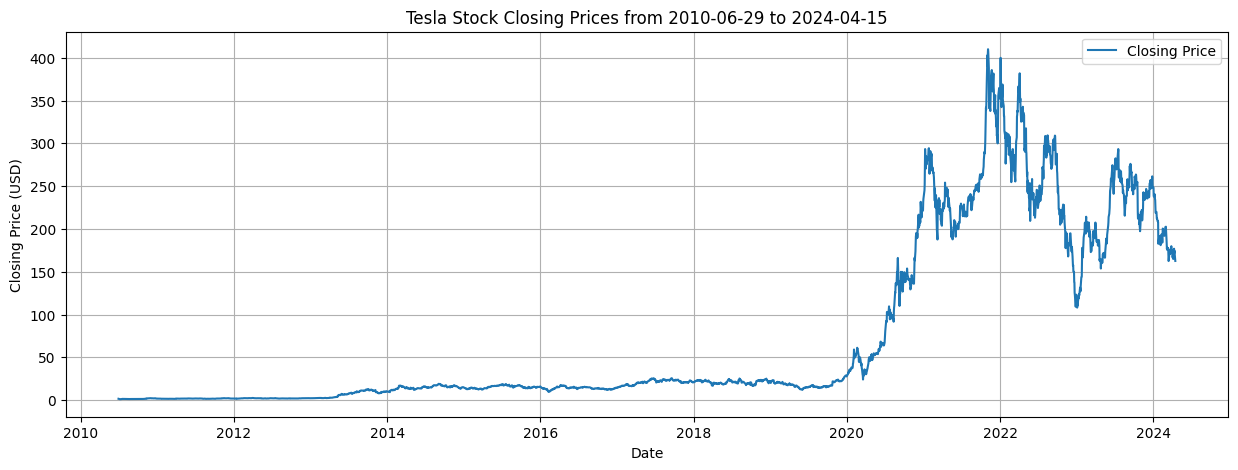

In [6]:
def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    """
    Plot the closing prices of Tesla stock from the given start date to the given end date.
    """
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    filtered_df = df.loc[mask]
    
    plt.figure(figsize=(15, 5))
    plt.plot(filtered_df['Date'], filtered_df['Close'], label='Closing Price')
    plt.title(f'Tesla Stock Closing Prices from {start} to {end}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_close(load_data())

Exercise 3

In [7]:
def autoregress(df: pd.DataFrame) -> float:
    """
    Estimate the autoregressive coefficient of the first lag of the closing prices of Tesla stock.
    """
    df['Change'] = df['Close'].diff()
    df = df.dropna()
    df['Lagged_Change'] = df['Change'].shift(1)
    df = df.dropna()
    X = df['Lagged_Change']
    y = df['Change']
    model = sm.OLS(y, X).fit(cov_type='HC1')
    t_statistic = model.tvalues[0]

    return t_statistic

autoregress(load_data())

C:\Users\johnx\AppData\Local\Temp\ipykernel_8628\3243990018.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_statistic = model.tvalues[0]


-0.7824767386823547

Exercise 4

In [12]:
def autoregress_logit(df: pd.DataFrame) -> float:
    """
    Perform a logistic regression with the lagged change in closing price as the independent variable.
    """
    df['Change'] = df['Close'].diff()
    df['Change_lagged'] = df['Change'].shift(1)
    df = df.dropna()
    df['Target'] = (df['Change'] >= 0).astype(int)
    X = add_constant(df['Change_lagged'])
    Y = df['Target']
    model = Logit(Y, X).fit(disp=0)
    t_stat = model.tvalues[0]
    
    return t_stat

autoregress_logit(load_data())


C:\Users\johnx\AppData\Local\Temp\ipykernel_8628\1435702276.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = model.tvalues[0]


2.354153335283573

Exercise 5

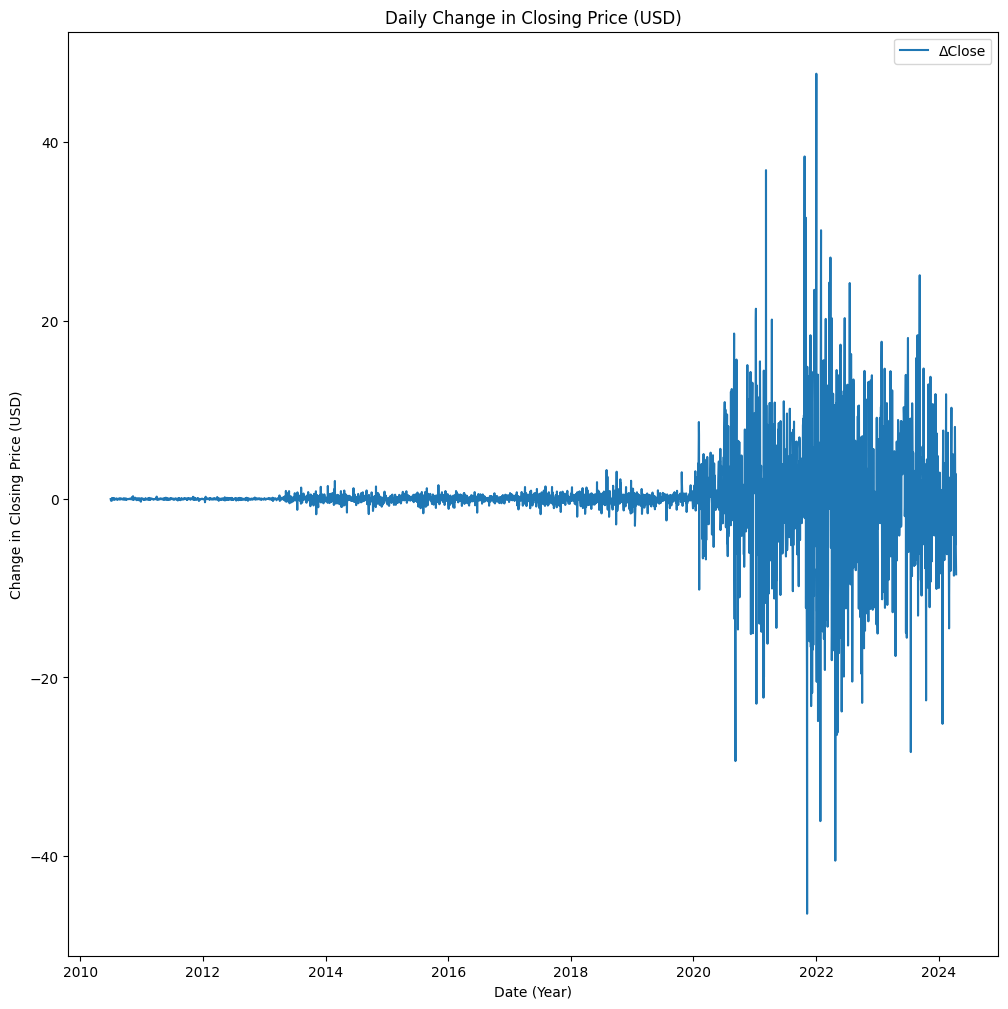

In [10]:
import matplotlib.pyplot as plt

def plot_delta(df: pd.DataFrame) -> None:
    """
    Plot the daily change in closing price.
    """
    df['Date'] = pd.to_datetime(df['Date'])
    df['Delta_Close'] = df['Close'].diff()
    
    plt.figure(figsize=(12, 12))
    plt.plot(df['Date'], df['Delta_Close'], label='ΔClose')
    plt.title('Daily Change in Closing Price (USD)')
    plt.xlabel('Date (Year)')
    plt.ylabel('Change in Closing Price (USD)')
    plt.legend()
    plt.show()

plot_delta(load_data())